# plotting results: low dune growth rate

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from cascade.tools import outwash_plotters as out_plt
from importlib import reload

In [2]:
b3d_data = np.load(r"C:\Users\Lexi\Documents\Research\Outwasher Paper\run_output\avgs\VCR_overwash_storms\low_dune_growth\config1\config1_b3d_startyr1_interval20yrs.npz", allow_pickle=True)
b3d_obj = b3d_data["cascade"][0]

out100 = np.load(r"C:\Users\Lexi\Documents\Research\Outwasher Paper\run_output\avgs\VCR_overwash_storms\low_dune_growth\config1\config1_outwash100_startyr1_interval20yrs.npz", allow_pickle=True)
out100_obj = out100["cascade"][0]

out50 = np.load(r"C:\Users\Lexi\Documents\Research\Outwasher Paper\run_output\avgs\VCR_overwash_storms\low_dune_growth\config1\config1_outwash50_startyr1_interval20yrs.npz", allow_pickle=True)
out50_obj = out50["cascade"][0]

out0 = np.load(r"C:\Users\Lexi\Documents\Research\Outwasher Paper\run_output\avgs\VCR_overwash_storms\low_dune_growth\config1\config1_outwash0_startyr1_interval20yrs.npz", allow_pickle=True)
out0_obj = out0["cascade"][0]


In [3]:
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams.update({"font.size": 15})
ls="dashed"

## shoreline position

Text(0.5, 1.0, 'cascade-VCR')

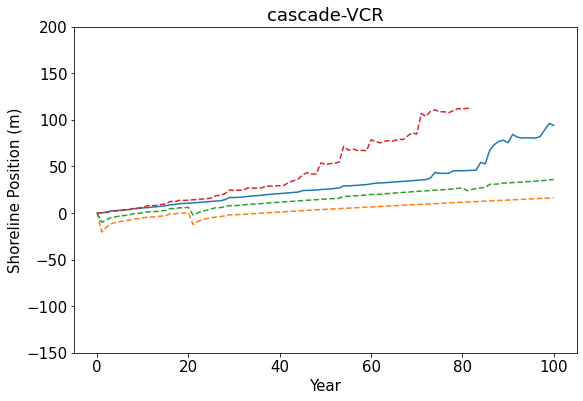

In [4]:
m_xsTS_b = np.subtract(b3d_obj.barrier3d[0].x_s_TS, b3d_obj.barrier3d[0].x_s_TS[0])
m_xsTS_b = np.multiply(m_xsTS_b,10)

m_xsTS_100 = np.subtract(out100_obj.barrier3d[0].x_s_TS, out100_obj.barrier3d[0].x_s_TS[0])
m_xsTS_100 = np.multiply(m_xsTS_100,10)

m_xsTS_50 = np.subtract(out50_obj.barrier3d[0].x_s_TS, out50_obj.barrier3d[0].x_s_TS[0])
m_xsTS_50 = np.multiply(m_xsTS_50,10)

m_xsTS_0 = np.subtract(out0_obj.barrier3d[0].x_s_TS, out0_obj.barrier3d[0].x_s_TS[0])
m_xsTS_0 = np.multiply(m_xsTS_0,10)

plt.plot(m_xsTS_b, label="overwash only")
plt.plot(m_xsTS_100, label="100% washout to shoreface", linestyle=ls)
plt.plot(m_xsTS_50, label="50% washout to shoreface", linestyle=ls)
plt.plot(m_xsTS_0, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Shoreline Position (m)")

plt.ylim((-150, 200))

# plt.vlines([1,21,41,61,81], -150, 250, colors="k", linestyles='dotted', label='outwash events')
# plt.legend()
plt.title("cascade-VCR")


## beach width

Text(0.5, 1.0, 'cascade-VCR')

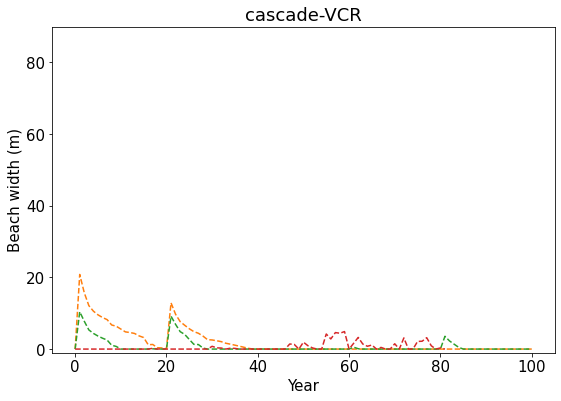

In [5]:
beach = np.array(b3d_obj.outwash[0]._beach_width)
beach2 = np.array(out100_obj.outwash[0]._beach_width)
beach3 = np.array(out50_obj.outwash[0]._beach_width)
beach4 = np.array(out0_obj.outwash[0]._beach_width)

plt.plot(beach, label="overwash only")
plt.plot(beach2, label="100% washout to shoreface", linestyle=ls)
plt.plot(beach3, label="50% washout to shoreface", linestyle=ls)
plt.plot(beach4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Beach width (m)")
plt.ylim(top=90)
# plt.legend()
plt.title("cascade-VCR")

# dune position (shoreline position + beach width)

Text(0.5, 1.0, 'cascade-VCR')

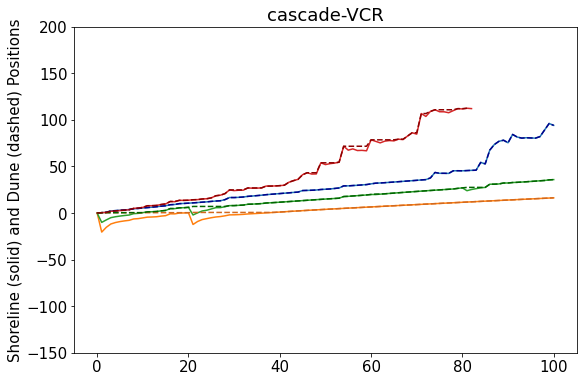

In [6]:
dune_position = m_xsTS_b
dune_position_100 = m_xsTS_100 + beach2
dune_position_50 = m_xsTS_50 + beach3
dune_position_0 = m_xsTS_0 + beach4[0:83]

plt.plot(m_xsTS_b, label="overwash only")
plt.plot(m_xsTS_100, label="100% washout to shoreface")
plt.plot(m_xsTS_50, label="50% washout to shoreface")
plt.plot(m_xsTS_0, label="0% washout to shoreface")

plt.plot(dune_position, linestyle=ls, color="darkblue")
plt.plot(dune_position_100, linestyle=ls, color="chocolate")
plt.plot(dune_position_50, linestyle=ls, color="darkgreen")
plt.plot(dune_position_0, linestyle=ls, color="darkred")

# plt.legend()
plt.ylabel("Shoreline (solid) and Dune (dashed) Positions")

plt.ylim((-150, 200))
plt.title("cascade-VCR")

## avg interior elevation

Text(0.5, 1.0, 'cascade-VCR')

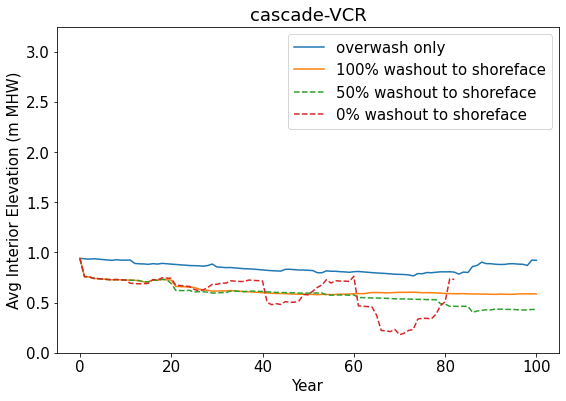

In [7]:
hbTS = np.array(b3d_obj.barrier3d[0].h_b_TS)*10
hbTS2 = np.array(out100_obj.barrier3d[0].h_b_TS)*10
hbTS3 = np.array(out50_obj.barrier3d[0].h_b_TS)*10
hbTS4 = np.array(out0_obj.barrier3d[0].h_b_TS)*10

plt.plot(hbTS, label="overwash only")
plt.plot(hbTS2, label="100% washout to shoreface", linestyle="solid")
plt.plot(hbTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(hbTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Avg Interior Elevation (m MHW)")
plt.legend()

# plt.legend(loc="upper left")
# plt.title("Avg Interior Elevation (m)")

plt.ylim(0, 3.25)
plt.title("cascade-VCR")

## avg barrier width 

Text(0.5, 1.0, 'cascade-VCR')

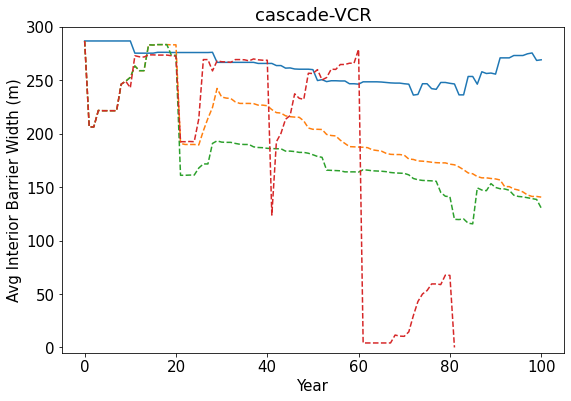

In [8]:
xbTS = np.array(b3d_obj.barrier3d[0].InteriorWidth_AvgTS)*10
xbTS2 = np.array(out100_obj.barrier3d[0].InteriorWidth_AvgTS)*10
xbTS3 = np.array(out50_obj.barrier3d[0].InteriorWidth_AvgTS)*10
xbTS4 = np.array(out0_obj.barrier3d[0].InteriorWidth_AvgTS)*10

plt.plot(xbTS, label="overwash only")
plt.plot(xbTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(xbTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(xbTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Avg Interior Barrier Width (m)")


plt.ylim(-5, 300)
# plt.vlines([1,21,41,61,81], -5 ,300, colors="k", linestyles='dotted', label='outwash events')

# plt.legend()
plt.title("cascade-VCR")

## overwash flux

Text(0.5, 1.0, 'cascade-VCR')

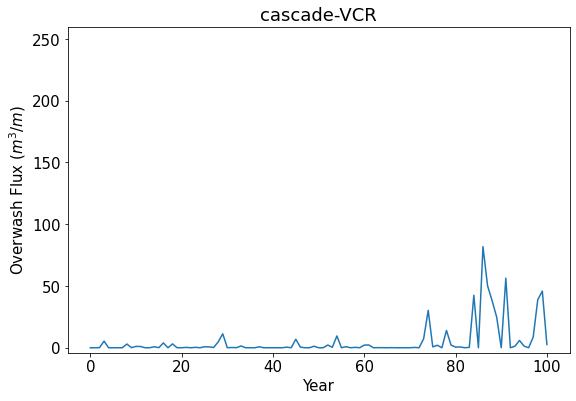

In [18]:
OWTS = b3d_obj.barrier3d[0].QowTS #m3/m
OWTS2 = out100_obj.barrier3d[0].QowTS #m3/m
OWTS3 = out50_obj.barrier3d[0].QowTS #m3/m
OWTS4 = out0_obj.barrier3d[0].QowTS #m3/m

plt.plot(OWTS, label="overwash only")
# plt.plot(OWTS2, label="100% washout to shoreface", linestyle="solid")
# plt.plot(OWTS3, label="50% washout to shoreface", linestyle=ls)
# plt.plot(OWTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Overwash Flux ($m^3/m$)")
# plt.legend()
# plt.title("Overwash")

plt.ylim(top=260)
plt.title("cascade-VCR")

## Outwash Volume

Text(0.5, 1.0, 'cascade-VCR')

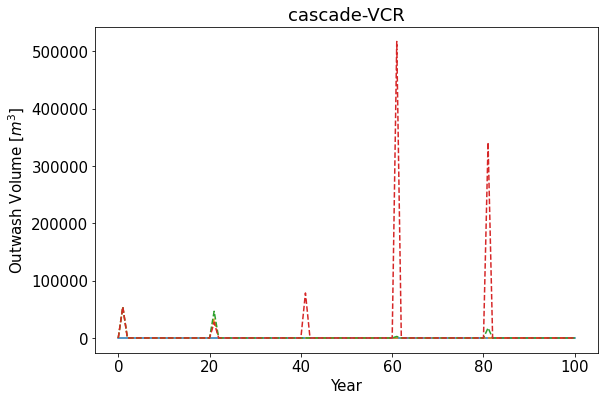

In [10]:
volTS = b3d_obj.outwash[0]._outwash_TS #m3/m
volTS2 = out100_obj.outwash[0]._outwash_TS #m3/m
volTS3 = out50_obj.outwash[0]._outwash_TS #m3/m
volTS4 = out0_obj.outwash[0]._outwash_TS #m3/m

plt.plot(volTS, label="overwash only")
plt.plot(volTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(volTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(volTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Outwash Volume [$m^3$]")
# plt.legend(loc="upper right")

# plt.title("Overwash")
plt.title("cascade-VCR")

## Outwash Flux

Text(0.5, 1.0, 'cascade-VCR')

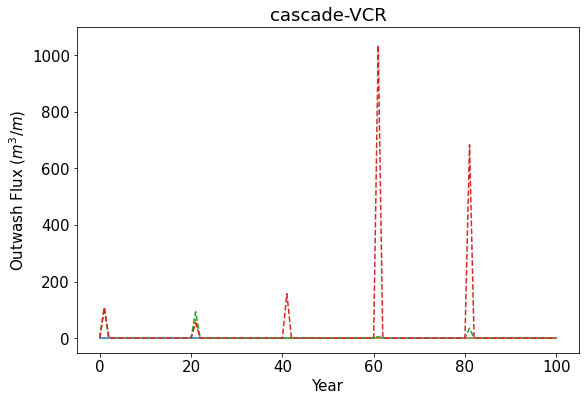

In [11]:
fluxTS = b3d_obj.outwash[0]._outwash_flux_TS #m3/m
fluxTS2 = out100_obj.outwash[0]._outwash_flux_TS #m3/m
fluxTS3 = out50_obj.outwash[0]._outwash_flux_TS #m3/m
fluxTS4 = out0_obj.outwash[0]._outwash_flux_TS #m3/m

plt.plot(fluxTS, label="overwash only")
plt.plot(fluxTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(fluxTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(fluxTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Outwash Flux ($m^3/m$)")
# plt.legend()


# plt.legend(loc="upper right")
# plt.title("Overwash")

plt.ylim(top=1100)
plt.title("cascade-VCR")

## shoreface slope

Text(0.5, 1.0, 'cascade-VCR')

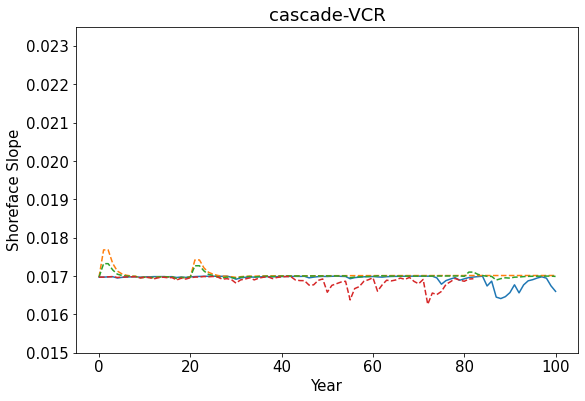

In [12]:
sfTS = b3d_obj.barrier3d[0].s_sf_TS 
sfTS2 = out100_obj.barrier3d[0].s_sf_TS 
sfTS3 = out50_obj.barrier3d[0].s_sf_TS 
sfTS4 = out0_obj.barrier3d[0].s_sf_TS 

plt.plot(sfTS, label="overwash only")
plt.plot(sfTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(sfTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(sfTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Shoreface Slope")
# plt.legend()

# plt.title("Shoreface Slope")

plt.ylim((0.015, 0.0235))
# plt.vlines([1,21,41,61,81], 0.015, 0.0235, colors="k", linestyles='dotted', label='outwash events')
plt.title("cascade-VCR")


## Dunes

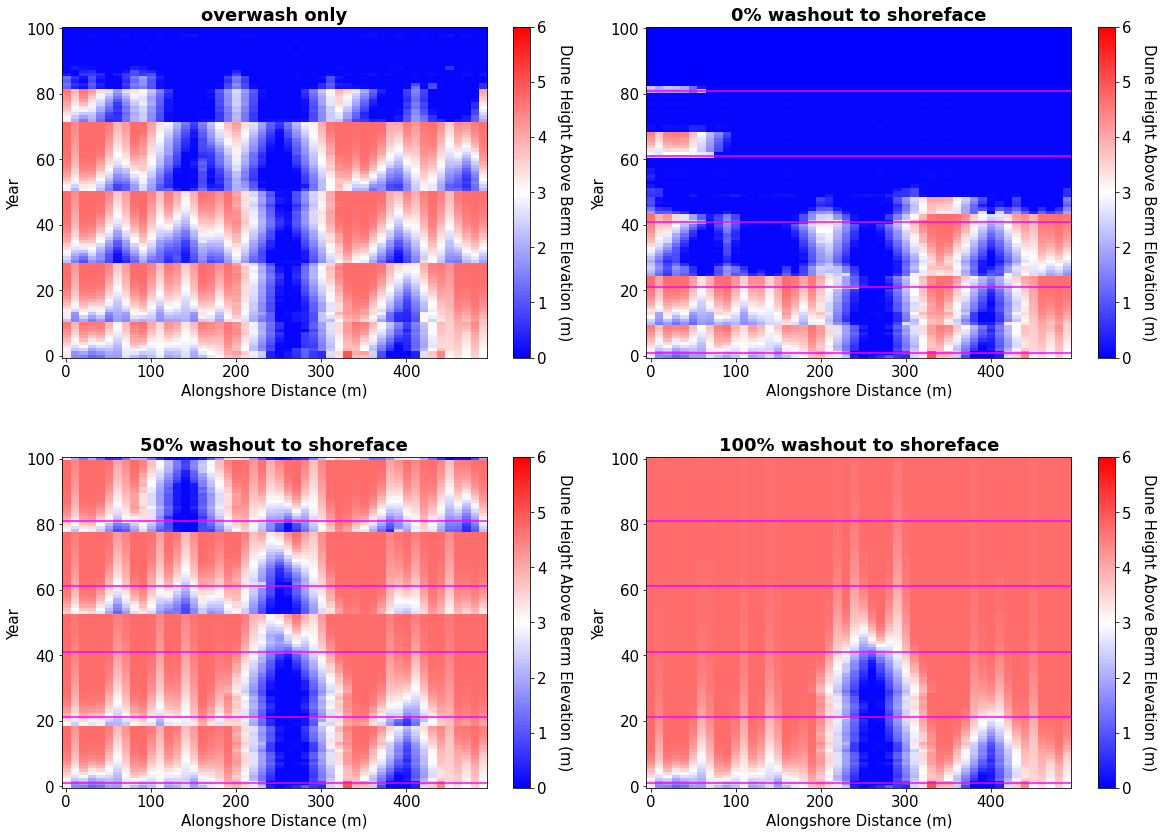

In [13]:
TMAX=101
vmin=0
vmax=6


# Barrier3d only

b3d = b3d_obj.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

duneFig = plt.figure(figsize=(20, 14))
plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(221)
cax = ax.matshow(
    np.flip(DuneCrest,1) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("overwash only", weight="bold")
# plt.hlines(20, -0.5, 49.5, color="k", linestyles='dashed', linewidth=1)

xtick_max = np.shape(DuneCrest)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)

# cascade 100%

b3d = out100_obj.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(224)
cax = ax.matshow(
    np.flip(DuneCrest,1) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("100% washout to shoreface", weight="bold")
plt.xticks(x_ticks, x_tick_labels)
plt.hlines([1,21,41,61,81], -0.5, 49.5, colors="magenta", linestyles='solid')

# cascade 50%

b3d = out50_obj.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(223)
cax = ax.matshow(
    np.flip((DuneCrest),1) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("50% washout to shoreface", weight="bold")
plt.xticks(x_ticks, x_tick_labels)
plt.hlines([1,21,41,61,81], -0.5, 49.5, colors="magenta", linestyles='solid')

# cascade 0%

b3d = out0_obj.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(222)
cax = ax.matshow(
    np.flip(DuneCrest,1) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("0% washout to shoreface", weight="bold")
plt.xticks(x_ticks, x_tick_labels)
plt.hlines([1,21,41,61,81], -0.5, 49.5, colors="magenta", linestyles='solid')
# plt.hlines(20, -0.5, 49.5, color="k", linestyles='dashed', linewidth=1)


plt.subplots_adjust(hspace=0.3, wspace=0.1)

# Elevation Plots

In [14]:
# reload(out_plt)

In [15]:
# ylim = (125, 225)
# zlim = 6
# zbot = -1
# directory ="C:/Users/Lexi/Documents/Research/Outwasher Paper/run_output/avgs/low_dune_growth/config1/"

# _ = out_plt.plot_ElevAnimation_CASCADE(
#     cascade=b3d_obj,
#     directory=directory,
#     TMAX_MGMT=[0],
#     name="cascade_plt_b3d_only_startyr1_interval20yrs",
#     TMAX_SIM=101,
#     ny=1,
#     beach_management_ny=None,  # list of bool the length of ny, or None for all False
#     roadway_management_ny=None,
#     y_lim=ylim,
#     z_lim=zlim,
#     z_bot=zbot,
#     fig_size=None,
#     fig_eps=False,
#     km_on=True,
# )


# _ = out_plt.plot_ElevAnimation_CASCADE(
#     cascade=out100_obj,
#     directory=directory,
#     TMAX_MGMT=[0],
#     name="cascade_plt_100out_startyr1_interval20yrs",
#     TMAX_SIM=101,
#     ny=1,
#     beach_management_ny=None,  # list of bool the length of ny, or None for all False
#     roadway_management_ny=None,
#     y_lim=ylim,
#     z_lim=zlim,
#     z_bot=zbot,
#     fig_size=None,
#     fig_eps=False,
#     km_on=True,
# )

# _ = out_plt.plot_ElevAnimation_CASCADE(
#     cascade=out50_obj,
#     directory=directory,
#     TMAX_MGMT=[0],
#     name="cascade_plt_50out_startyr1_interval20yrs",
#     TMAX_SIM=101,
#     ny=1,
#     beach_management_ny=None,  # list of bool the length of ny, or None for all False
#     roadway_management_ny=None,
#     y_lim=ylim,
#     z_lim=zlim,
#     z_bot=zbot,
#     fig_size=None,
#     fig_eps=False,
#     km_on=True,
# )

# _ = out_plt.plot_ElevAnimation_CASCADE(
#     cascade=out0_obj,
#     directory=directory,
#     TMAX_MGMT=[0],
#     name="cascade_plt_0out_startyr1_interval20yrs",
#     TMAX_SIM=82,
#     ny=1,
#     beach_management_ny=None,  # list of bool the length of ny, or None for all False
#     roadway_management_ny=None,
#     y_lim=ylim,
#     z_lim=zlim,
#     z_bot=zbot,
#     fig_size=None,
#     fig_eps=False,
#     km_on=True,
# )